In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [63]:
df=pd.read_csv('h1n1_vaccine_prediction.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [65]:
df1=df.drop(['unique_id'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [66]:
dfnomissing=df1.dropna()
dfnomissing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11794 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 11794 non-null  float64
 1   h1n1_awareness             11794 non-null  float64
 2   antiviral_medication       11794 non-null  float64
 3   contact_avoidance          11794 non-null  float64
 4   bought_face_mask           11794 non-null  float64
 5   wash_hands_frequently      11794 non-null  float64
 6   avoid_large_gatherings     11794 non-null  float64
 7   reduced_outside_home_cont  11794 non-null  float64
 8   avoid_touch_face           11794 non-null  float64
 9   dr_recc_h1n1_vacc          11794 non-null  float64
 10  dr_recc_seasonal_vacc      11794 non-null  float64
 11  chronic_medic_condition    11794 non-null  float64
 12  cont_child_undr_6_mnths    11794 non-null  float64
 13  is_health_worker           11794 non-null  float64


In [67]:
df2=df1.drop(['has_health_insur'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [68]:
df3=df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  float64


In [69]:
df3.h1n1_vaccine.isnull().sum()
df3.h1n1_vaccine.value_counts()

,count
h1n1_vaccine,
0,15128
1,4514


Text(0.5, 1.0, 'Barplot of h1n1_vaccine')

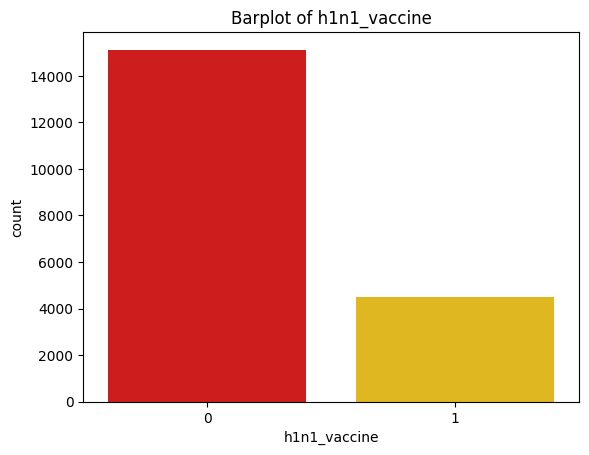

In [70]:
sns.countplot(x='h1n1_vaccine',data=df3,palette='hot')
plt.title('Barplot of h1n1_vaccine')

Text(0.5, 1.0, 'Histogram of h1n1_worry')

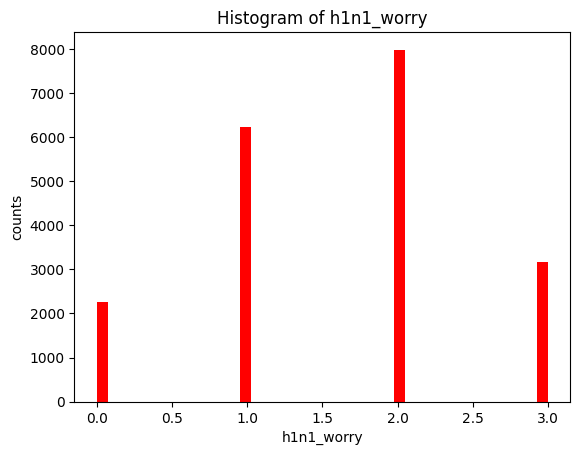

In [72]:
plt.hist(df3.h1n1_worry,bins='auto',facecolor='red')
plt.xlabel('h1n1_worry')
plt.ylabel('counts')
plt.title('Histogram of h1n1_worry')

In [71]:
df3.isnull().sum()

,0
h1n1_worry,0
h1n1_awareness,0
antiviral_medication,0
contact_avoidance,0
bought_face_mask,0
wash_hands_frequently,0
avoid_large_gatherings,0
reduced_outside_home_cont,0
avoid_touch_face,0
dr_recc_h1n1_vacc,0


In [12]:
df.value_counts()

h1n1_worry  h1n1_awareness  antiviral_medication  contact_avoidance  bought_face_mask  wash_hands_frequently  avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  dr_recc_h1n1_vacc  dr_recc_seasonal_vacc  chronic_medic_condition  cont_child_undr_6_mnths  is_health_worker  is_h1n1_vacc_effective  is_h1n1_risky  sick_from_h1n1_vacc  is_seas_vacc_effective  is_seas_risky  sick_from_seas_vacc  age_bracket    qualification     race   sex     income_level               marital_status  housing_status  employment          census_msa                no_of_adults  no_of_children  h1n1_vaccine
2.0         2.0             0.0                   1.0                0.0               1.0                    0.0                     0.0                        1.0               0.0                0.0                    0.0                      0.0                      0.0               5.0                     4.0            4.0                  5.0                     4.0            1.0                  35 - 44 Years  College Graduate  White  Female  > $75,000                  Married         Own             Employed            MSA, Principle City       1.0           2.0             0               2
                                                                                                                                                                                                                                                                                                 4.0                     2.0            2.0                  4.0                     2.0            2.0                  35 - 44 Years  College Graduate  White  Male    > $75,000                  Married         Own             Employed            MSA, Not Principle  City  1.0           2.0             0               2
            1.0             0.0                   1.0                0.0               1.0                    0.0                     0.0                        0.0               0.0                0.0                    0.0                      0.0                      0.0               4.0                     2.0            2.0                  4.0                     2.0            2.0                  55 - 64 Years  College Graduate  White  Female  <= $75,000, Above Poverty  Not Married     Own             Employed            MSA, Not Principle  City  0.0           0.0             0               2
1.0         2.0             0.0                   1.0                0.0               1.0                    0.0                     0.0                        1.0               0.0                0.0                    0.0                      0.0                      0.0               4.0                     1.0            2.0                  4.0                     2.0            2.0                  55 - 64 Years  College Graduate  White  Female  > $75,000                  Married         Own             Not in Labor Force  MSA, Principle City       1.0           0.0             0               2
0.0         1.0             0.0                   0.0                0.0               0.0                    0.0                     0.0                        0.0               0.0                0.0                    0.0                      0.0                      0.0               4.0                     1.0            1.0                  4.0                     1.0            1.0                  18 - 34 Years  College Graduate  White  Male    <= $75,000, Above Poverty  Not Married     Rent            Employed            Non-MSA                   0.0           0.0             0               2
                                                                                                                                                                                                                                                                                                                                                         

In [13]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0


Text(0.5, 1.0, 'barplot od h1n1vaccine')

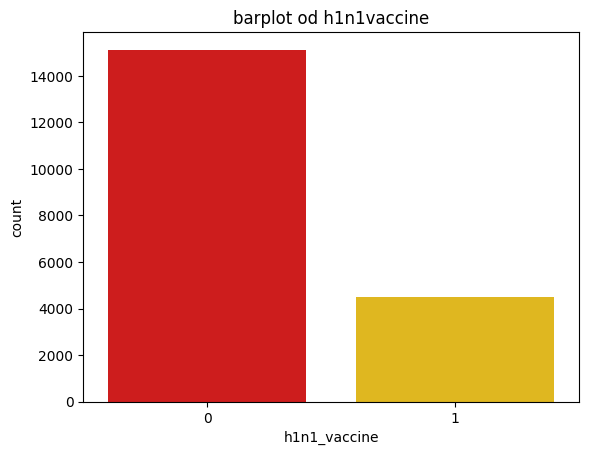

In [14]:
sns.countplot(x='h1n1_vaccine',data=df,palette='hot')
plt.title('barplot od h1n1vaccine')

Text(0.5, 1.0, 'histogram of h1n1_worry')

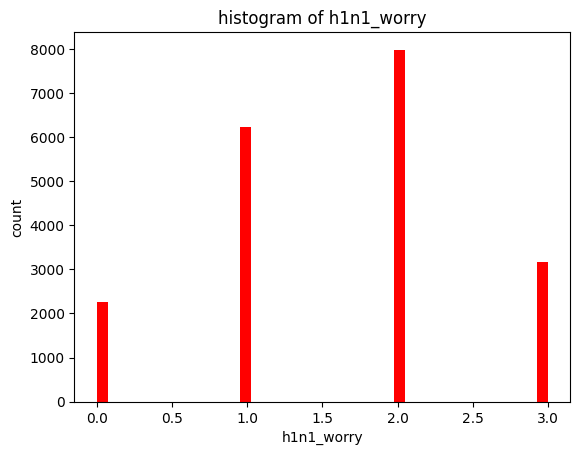

In [15]:
plt.hist(df.h1n1_worry,bins='auto',facecolor='red')
plt.xlabel('h1n1_worry')
plt.ylabel('count')
plt.title('histogram of h1n1_worry')

<Axes: >

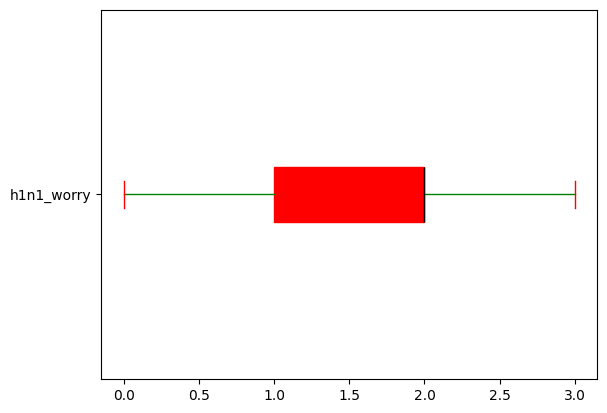

In [16]:
p2=dict(boxes='red',whiskers='green',medians='black',caps='red')
df['h1n1_worry'].plot.box(color=p2,patch_artist=True,vert=False)

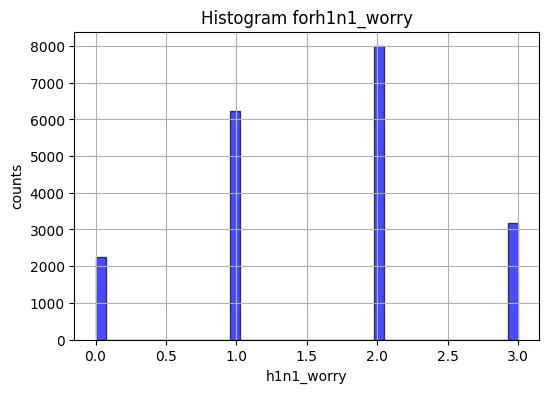

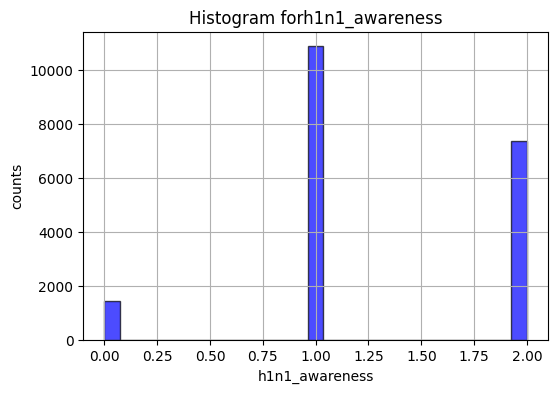

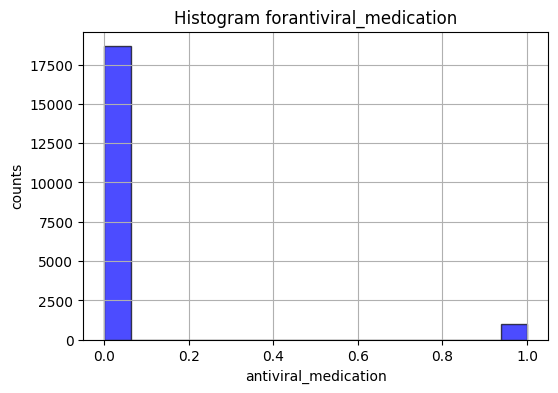

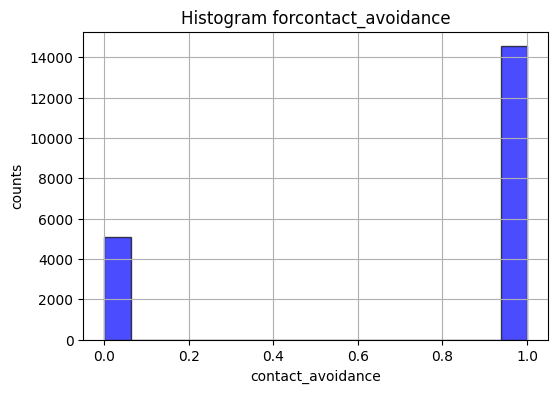

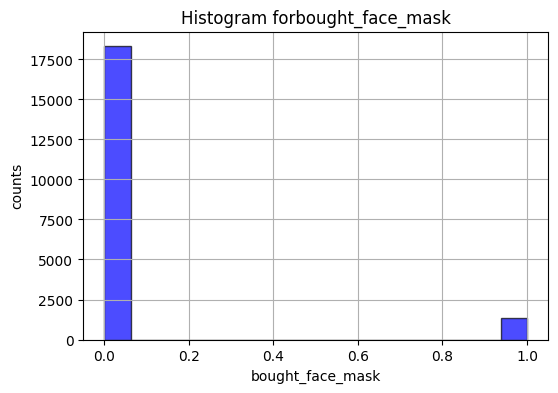

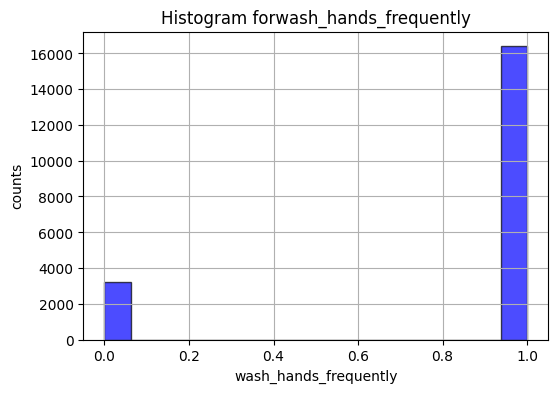

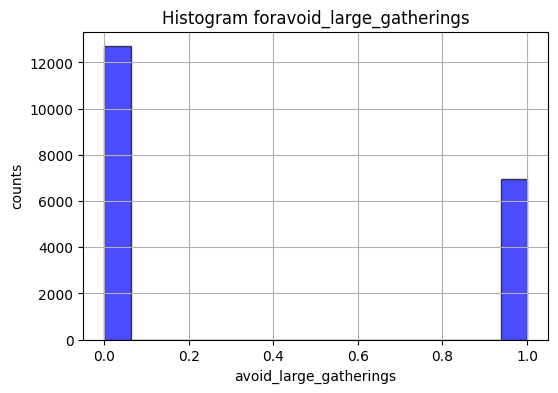

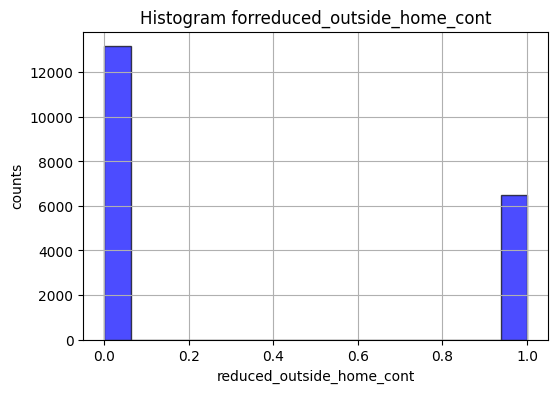

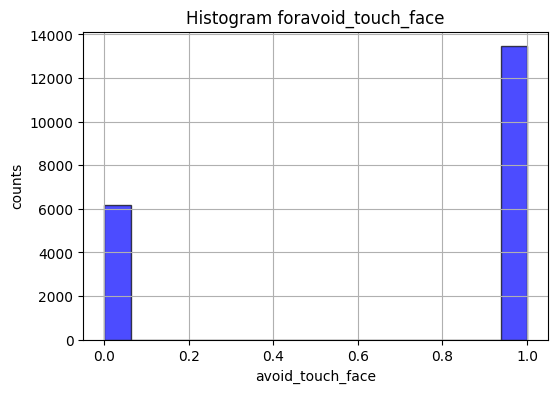

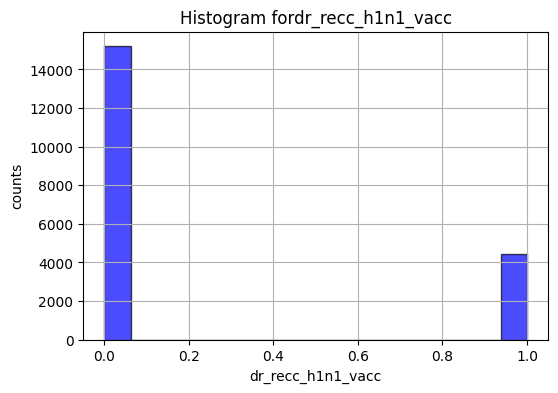

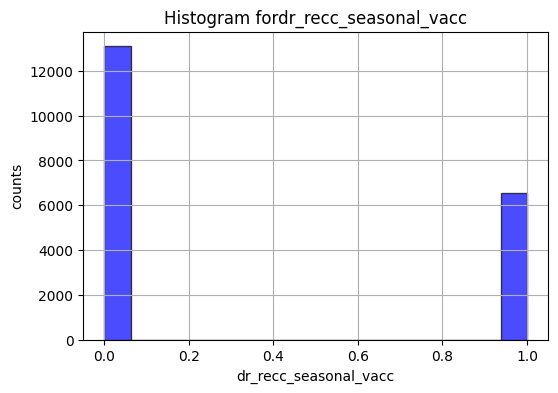

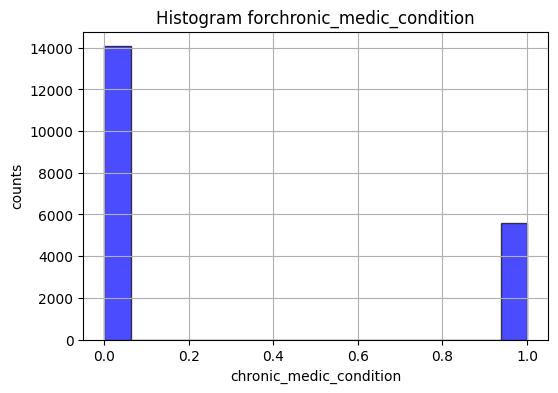

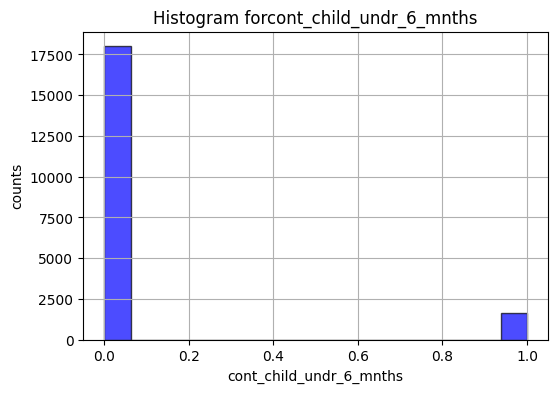

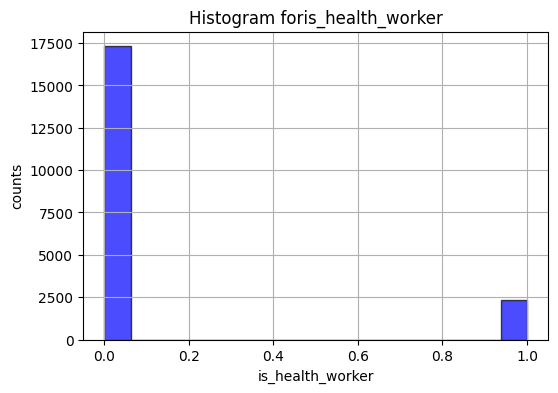

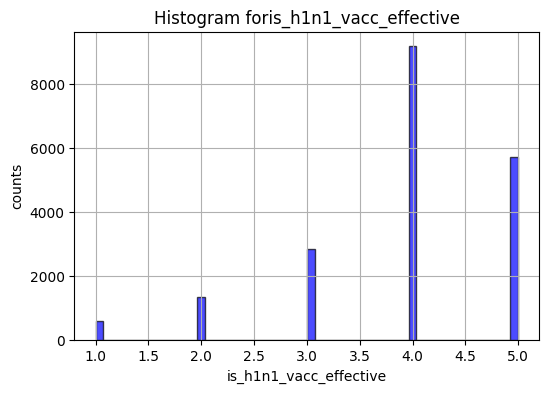

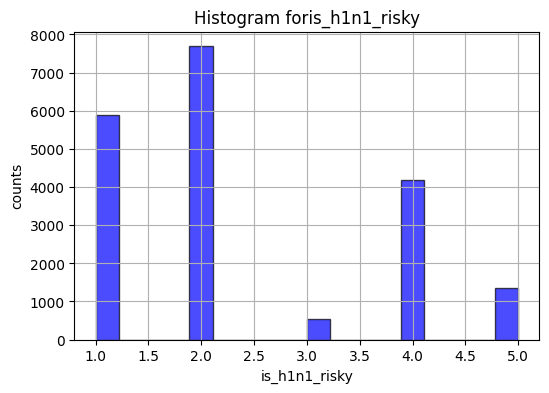

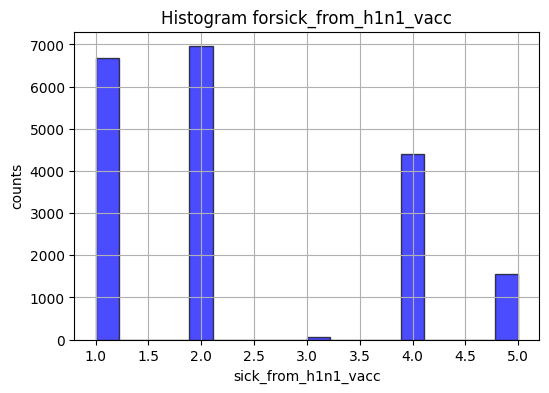

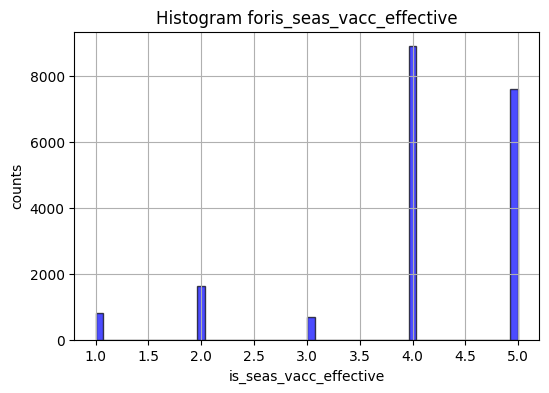

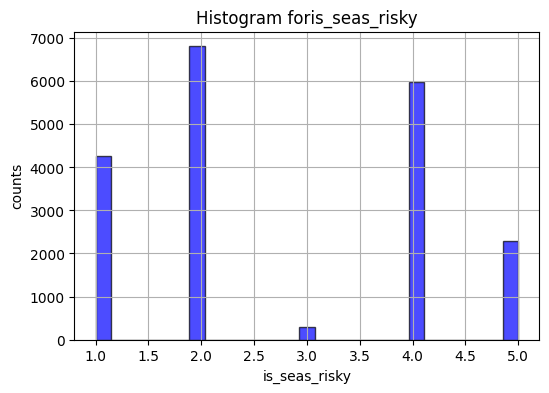

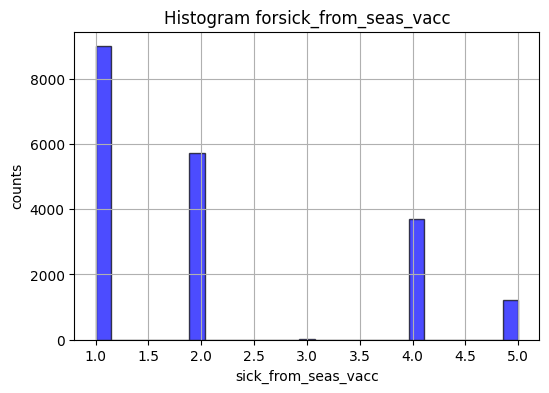

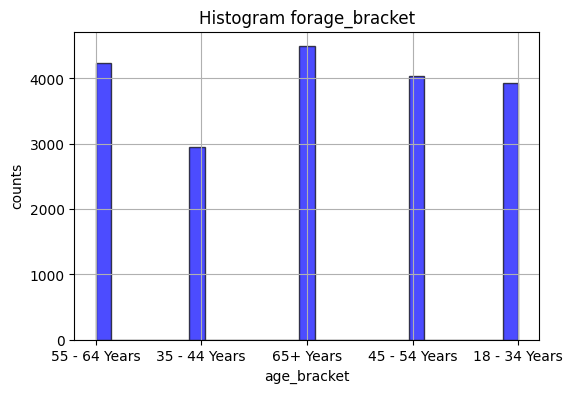

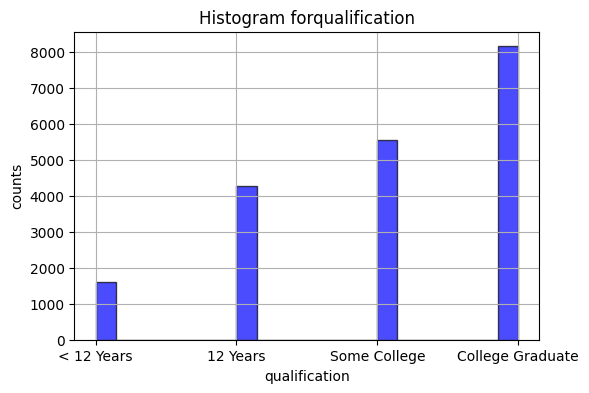

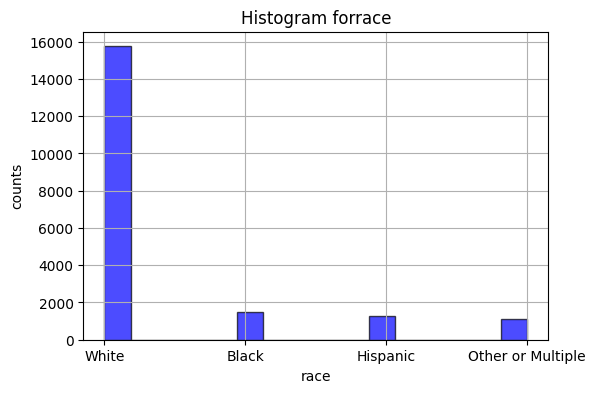

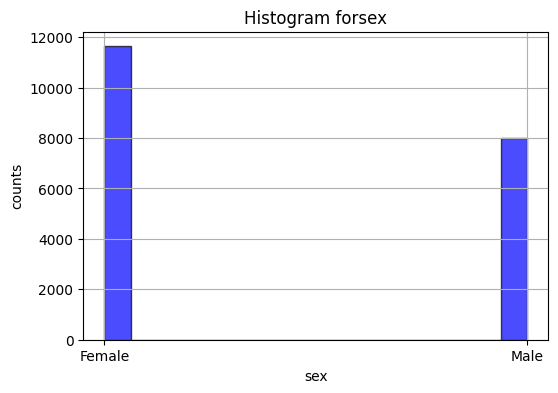

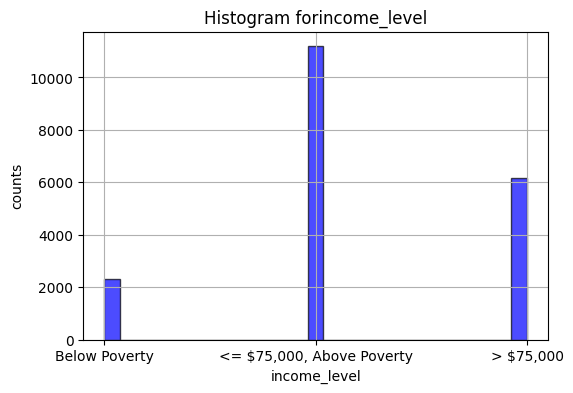

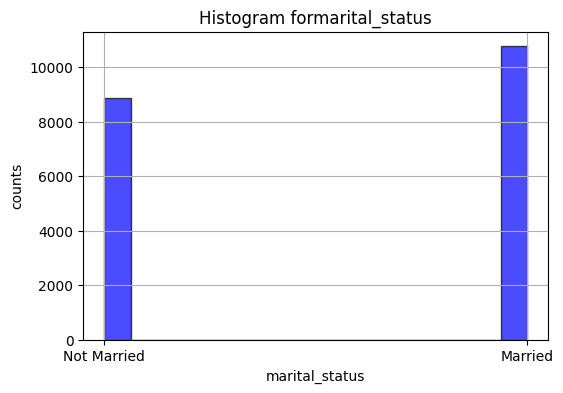

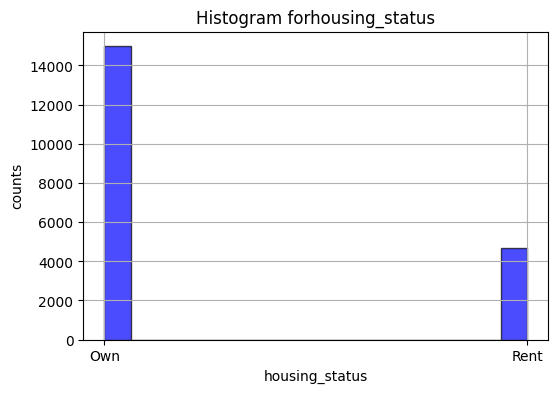

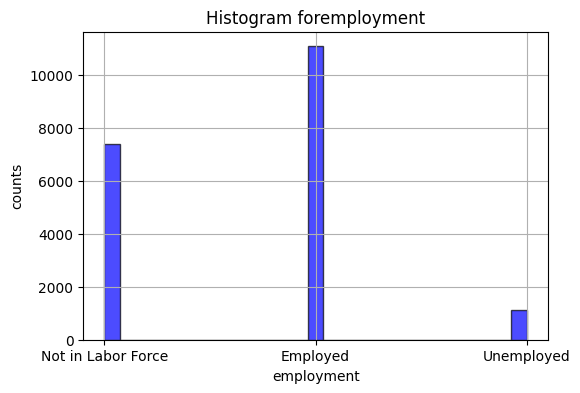

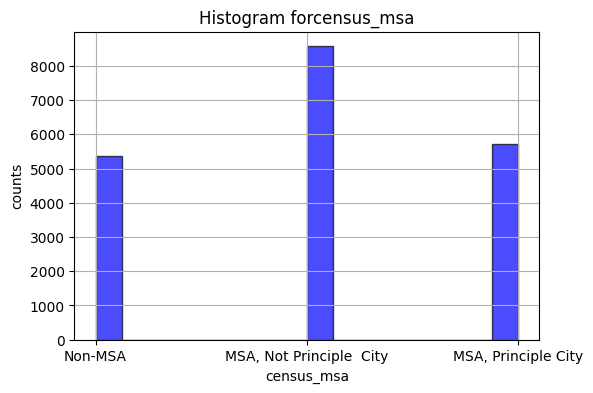

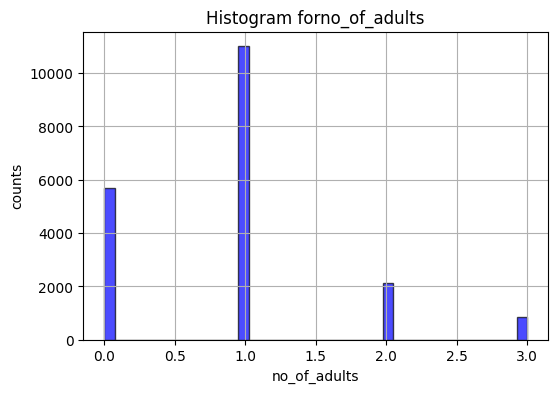

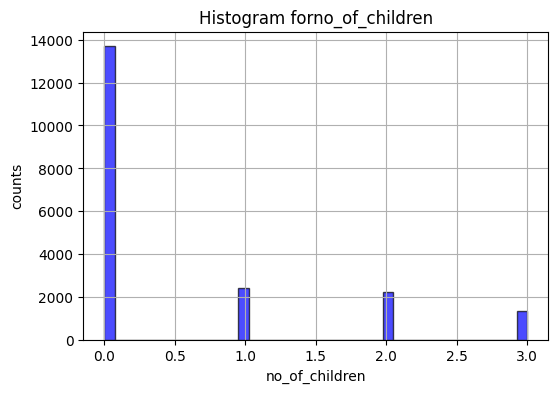

In [ ]:
for col in df.columns:
    if col != 'h1n1_vaccine':
        plt.figure(figsize=(6,4))
        plt.hist(df[col],bins='auto',facecolor='blue',alpha=0.7,edgecolor='black')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.title(f"Histogram for{col}")
        plt.grid(True)
        plt.show()

is h1n1_worry a good predictor

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('h1n1_worry~h1n1_vaccine',data=df).fit()
aov=sm.stats.anova_lm(mod)
print(aov)

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    278.817902  278.817902  359.846071  1.564062e-79
Residual      19640.0  15217.572282    0.774825         NaN           NaN


p_value<0.05 , h0 reject; good predictor

In [ ]:
#hypothesis testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('h1n1_awareness~h1n1_vaccine',data=df).fit()
aov=sm.stats.anova_lm(mod)
print(aov)

                   df       sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0   110.644675  110.644675  316.210167  3.441770e-70
Residual      19640.0  6872.206002    0.349909         NaN           NaN


p_value<0.05 , h0 reject; good predictor

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('antiviral_medication~h1n1_vaccine',data=df).fit()
aov=sm.stats.anova_lm(mod)
print(aov)

                   df      sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0    1.209693  1.209693  25.77419  3.872929e-07
Residual      19640.0  921.789034  0.046934       NaN           NaN


p_value<0.05 good predictor

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('contact_avoidance~h1n1_vaccine',data=df).fit()
aov=sm.stats.anova_lm(mod)
print(aov)

                   df       sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0     7.325788  7.325788  38.18928  6.546853e-10
Residual      19640.0  3767.509362  0.191828       NaN           NaN


p_value<0.05 good predictor

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('bought_face_mask~h1n1_vaccine',data=df).fit()
aov=sm.stats.anova_lm(mod)
print(aov)

                   df       sum_sq   mean_sq           F        PR(>F)
h1n1_vaccine      1.0     7.031149  7.031149  112.004583  4.191407e-26
Residual      19640.0  1232.911830  0.062776         NaN           NaN


p_value<0.05 good predictor

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols

# Iterate over the list of 31 fields (excluding 'h1n1_vaccine' which is the independent variable)
for col in df.columns:
    if col != 'h1n1_vaccine':  # Exclude the independent variable
        formula = f'{col} ~ h1n1_vaccine'  # Build the formula dynamically with the current column as the dependent variable
        mod = ols(formula, data=df).fit()  # Fit the OLS model
        aov = sm.stats.anova_lm(mod)  # Perform the ANOVA
        print(f"ANOVA for {col}:\n", aov)


ANOVA for h1n1_worry:
                    df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    278.817902  278.817902  359.846071  1.564062e-79
Residual      19640.0  15217.572282    0.774825         NaN           NaN
ANOVA for h1n1_awareness:
                    df       sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0   110.644675  110.644675  316.210167  3.441770e-70
Residual      19640.0  6872.206002    0.349909         NaN           NaN
ANOVA for antiviral_medication:
                    df      sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0    1.209693  1.209693  25.77419  3.872929e-07
Residual      19640.0  921.789034  0.046934       NaN           NaN
ANOVA for contact_avoidance:
                    df       sum_sq   mean_sq         F        PR(>F)
h1n1_vaccine      1.0     7.325788  7.325788  38.18928  6.546853e-10
Residual      19640.0  3767.509362  0.191828       NaN           NaN
ANOVA for bought_face_mask:
       

ValueError: endog has evaluated to an array with multiple columns that has shape (19642, 5). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols('is_seas_risky~h1n1_vaccine',data=df).fit()
aov=sm.stats.anova_lm(mod)
print(aov)

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   2938.840524  2938.840524  1655.101131     0.0
Residual      19640.0  34873.293730     1.775626          NaN     NaN


p_value 0.0 so bad predictor

In [ ]:
from scipy.stats import chi2_contingency
ct=pd.crosstab(df['h1n1_vaccine'],df['antiviral_medication'])
chi2_contingency(ct,correction=False)

Chi2ContingencyResult(statistic=25.7430310280289, pvalue=3.900328532557542e-07, dof=1, expected_freq=array([[14380.14906832,   747.85093168],
       [ 4290.85093168,   223.14906832]]))

p_value=3.9e-7,h0 reject,association exist good predictor

In [ ]:
from scipy.stats import chi2_contingency
ct2=pd.crosstab(df['h1n1_vaccine'],df['contact_avoidance'])
chi2_contingency(ct2,correction=False)

Chi2ContingencyResult(statistic=38.119047488867295, pvalue=6.655721920427935e-10, dof=1, expected_freq=array([[ 3926.40993789, 11201.59006211],
       [ 1171.59006211,  3342.40993789]]))

p_val=6.6 e-10,h0 reject ,association exist,good predictor

## h1n1_awareness [0,1,2] ordered

In [ ]:
df.h1n1_awareness.value_counts()

,count
h1n1_awareness,
1.0,10861
2.0,7362
0.0,1419


Text(0.5, 1.0, 'Histogram of h1n1_awareness')

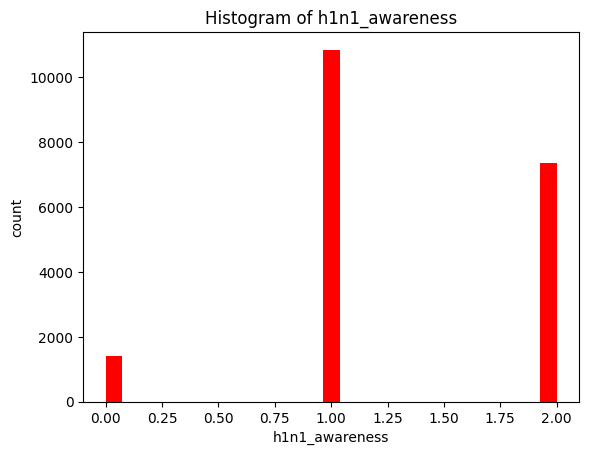

In [ ]:
plt.hist(df.h1n1_awareness, bins='auto', facecolor='red')
plt.xlabel('h1n1_awareness')
plt.ylabel('count')
plt.title('Histogram of h1n1_awareness')

<Axes: >

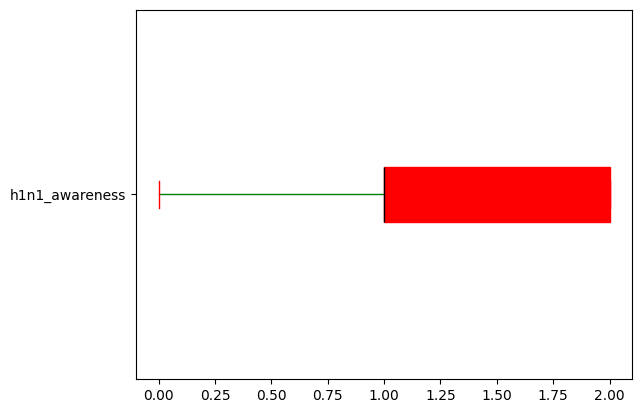

In [ ]:
props2=dict(boxes='red', whiskers='green', medians='black', caps='red')
df['h1n1_awareness'].plot.box(color=props2, patch_artist=True, vert=False)#No outliersv

Text(0.5, 1.0, 'Barplot of h1n1_awareness')

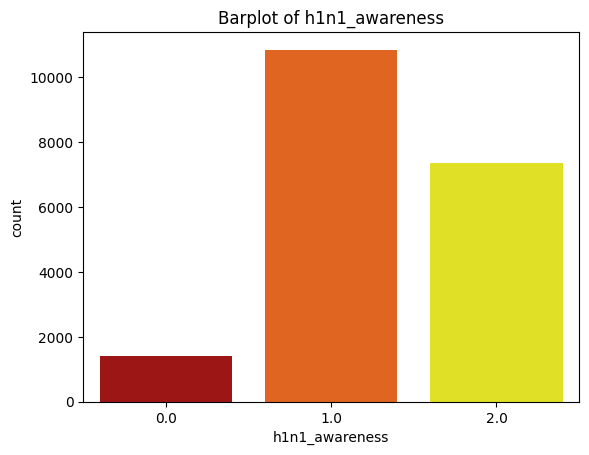

In [ ]:
sns.countplot(x='h1n1_awareness', data=df, palette='hot')
plt.title('Barplot of h1n1_awareness')

## antiviral_medication [0 and 1]

In [ ]:
df.antiviral_medication.isnull().sum()

0

In [ ]:
df.antiviral_medication.value_counts()

,count
antiviral_medication,
0.0,18671
1.0,971


Text(0.5, 1.0, 'Barplot of antiviral_medication')

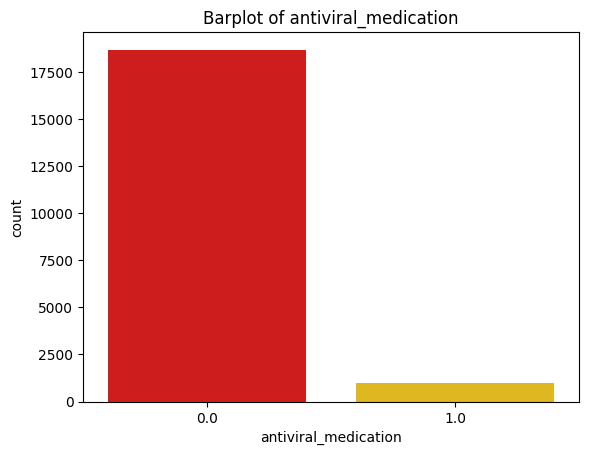

In [ ]:
sns.countplot(x='antiviral_medication', data=df , palette='hot')
plt.title('Barplot of antiviral_medication')

In [ ]:
ct_antiviral=pd.crosstab(df.h1n1_vaccine,df.antiviral_medication)
chi2_contingency(ct_antiviral,correction=False)

Chi2ContingencyResult(statistic=25.7430310280289, pvalue=3.900328532557542e-07, dof=1, expected_freq=array([[14380.14906832,   747.85093168],
       [ 4290.85093168,   223.14906832]]))

##independent or related.

## contact_avoidance [0 and 1]

In [ ]:
df.contact_avoidance.isnull().sum()

0

In [ ]:
df.contact_avoidance.value_counts()

,count
contact_avoidance,
1.0,14544
0.0,5098


Text(0.5, 1.0, 'Barplot of contact_avoidance')

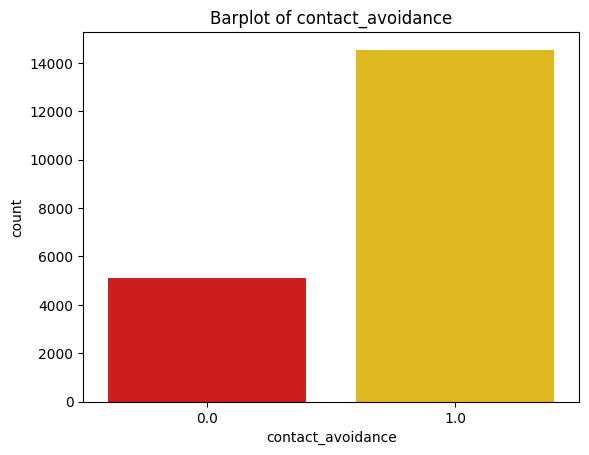

In [ ]:
sns.countplot(x='contact_avoidance', data=df, palette='hot')
plt.title('Barplot of contact_avoidance')

In [ ]:
ct_contact=pd.crosstab(df.h1n1_vaccine,df.contact_avoidance)
chi2_contingency(ct_contact,correction=False)

Chi2ContingencyResult(statistic=38.119047488867295, pvalue=6.655721920427935e-10, dof=1, expected_freq=array([[ 3926.40993789, 11201.59006211],
       [ 1171.59006211,  3342.40993789]]))

## bought_face_mask [0 and 1]

In [ ]:
df.bought_face_mask.isnull().sum()

0

In [ ]:
df.bought_face_mask.value_counts()

,count
bought_face_mask,
0.0,18312
1.0,1330


Text(0.5, 1.0, 'Barplot of bought_face_mask')

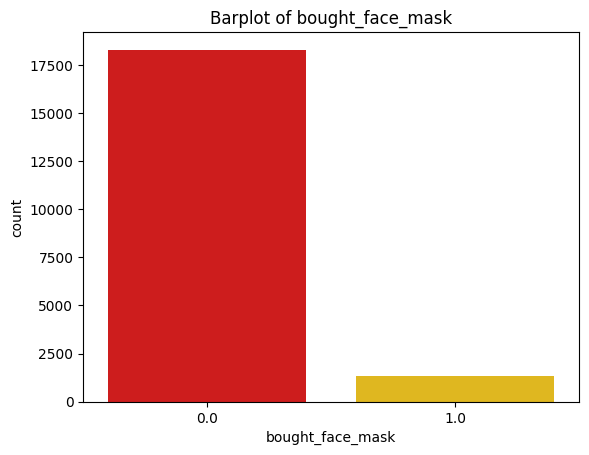

In [ ]:
sns.countplot(x='bought_face_mask', data=df , palette='hot')
plt.title('Barplot of bought_face_mask')

In [ ]:
ct_mask=pd.crosstab(df.h1n1_vaccine, df.bought_face_mask)
chi2_contingency(ct_mask, correction = False)

Chi2ContingencyResult(statistic=111.38079745607507, pvalue=4.8829999983371125e-26, dof=1, expected_freq=array([[14103.65217391,  1024.34782609],
       [ 4208.34782609,   305.65217391]]))

## wash_hands_frequently [0 and 1]

In [ ]:
df.wash_hands_frequently.isnull().sum()

0

In [ ]:
df.wash_hands_frequently.value_counts()

,count
wash_hands_frequently,
1.0,16399
0.0,3243


Text(0.5, 1.0, 'Barplot of wash_hands_frequently')

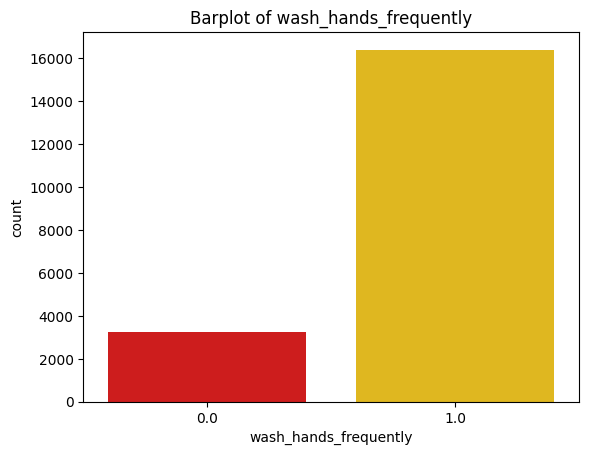

In [ ]:
sns.countplot(x='wash_hands_frequently', data=df , palette='hot')
plt.title('Barplot of wash_hands_frequently')

In [ ]:
ct_wash=pd.crosstab(df.h1n1_vaccine, df.wash_hands_frequently)
chi2_contingency(ct_wash, correction = False)

Chi2ContingencyResult(statistic=111.62137100015417, pvalue=4.32500265148964e-26, dof=1, expected_freq=array([[ 2497.71428571, 12630.28571429],
       [  745.28571429,  3768.71428571]]))

## avoid_large_gatherings [0 and 1]

In [ ]:
df.avoid_large_gatherings.isnull().sum()

0

In [ ]:
df.avoid_large_gatherings.value_counts()

,count
avoid_large_gatherings,
0.0,12703
1.0,6939


Text(0.5, 1.0, 'Barplot of avoid_large_gatherings')

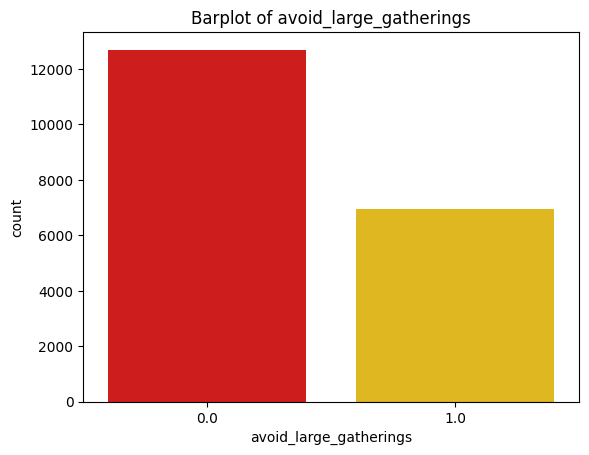

In [ ]:
sns.countplot(x='avoid_large_gatherings', data=df , palette='hot')
plt.title('Barplot of avoid_large_gatherings')

In [ ]:
ct_gath=pd.crosstab(df.h1n1_vaccine, df.avoid_large_gatherings)
chi2_contingency(ct_gath, correction = False)

Chi2ContingencyResult(statistic=8.326019959345679, pvalue=0.003908118862931521, dof=1, expected_freq=array([[9783.67701863, 5344.32298137],
       [2919.32298137, 1594.67701863]]))

## reduced_outside_home_cont [0 and 1]

In [ ]:
df.reduced_outside_home_cont.isnull().sum()

0

In [ ]:
df.reduced_outside_home_cont.value_counts()

,count
reduced_outside_home_cont,
0.0,13159
1.0,6483


Text(0.5, 1.0, 'Barplot of reduced_outside_home_cont')

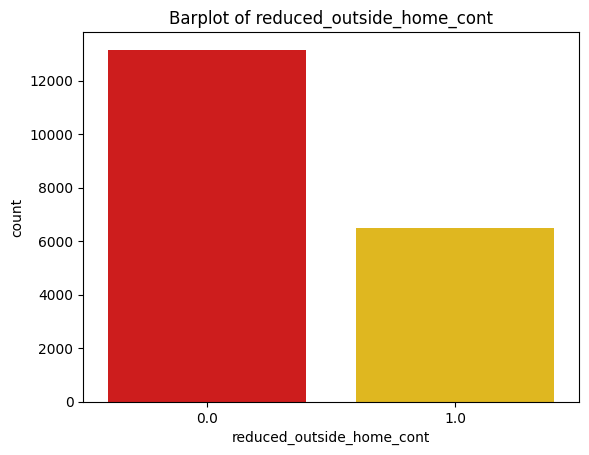

In [ ]:
sns.countplot(x='reduced_outside_home_cont', data=df, palette='hot')
plt.title('Barplot of reduced_outside_home_cont')

In [ ]:
ct_outside=pd.crosstab(df.h1n1_vaccine, df.reduced_outside_home_cont)
chi2_contingency(ct_outside, correction = False)

Chi2ContingencyResult(statistic=5.859941970831115, pvalue=0.015489304669565737, dof=1, expected_freq=array([[10134.88198758,  4993.11801242],
       [ 3024.11801242,  1489.88198758]]))

## avoid_touch_face [0 and 1]

In [ ]:
df.avoid_touch_face.isnull().sum()

0

In [ ]:
df.avoid_touch_face.value_counts()

,count
avoid_touch_face,
1.0,13455
0.0,6187


Text(0.5, 1.0, 'Barplot of avoid_touch_face')

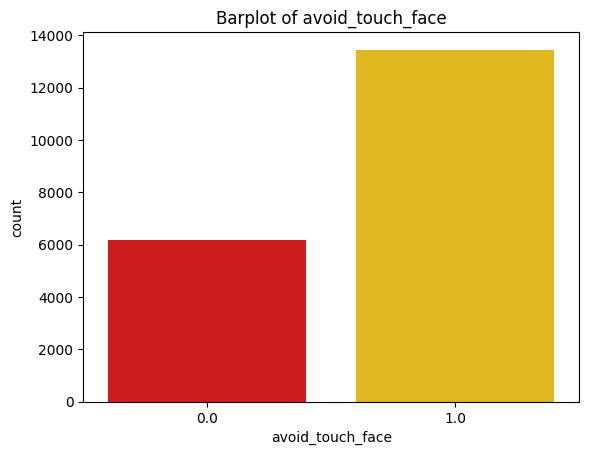

In [ ]:
sns.countplot(x='avoid_touch_face', data=df , palette='hot')
plt.title('Barplot of avoid_touch_face')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.avoid_touch_face)
chi2_contingency(ct_face, correction = False)

Chi2ContingencyResult(statistic=99.97660321127165, pvalue=1.5420802703508326e-23, dof=1, expected_freq=array([[ 4765.14285714, 10362.85714286],
       [ 1421.85714286,  3092.14285714]]))

If the p-value is significant, it suggests that people's behavior regarding avoiding touching their face is related to whether or not they got the vaccine

If the p-value is less than a significance level (typically 0.05), you can reject the null hypothesis. This means there is a significant association between whether someone got the H1N1 vaccine and whether they avoid touching their face.

## dr_recc_h1n1_vacc [0 and 1]

In [ ]:
df.dr_recc_h1n1_vacc.isnull().sum()

0

In [ ]:
df.dr_recc_h1n1_vacc.value_counts()

,count
dr_recc_h1n1_vacc,
0.0,15203
1.0,4439


Text(0.5, 1.0, 'Barplot of dr_recc_h1n1_vacc')

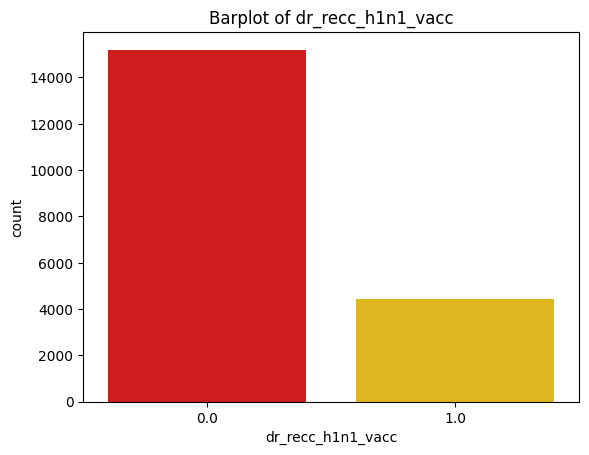

In [ ]:
sns.countplot(x='dr_recc_h1n1_vacc', data=df , palette='hot')
plt.title('Barplot of dr_recc_h1n1_vacc')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.dr_recc_h1n1_vacc)
chi2_contingency(ct_face, correction = False)

Chi2ContingencyResult(statistic=3094.6916755786597, pvalue=0.0, dof=1, expected_freq=array([[11709.14285714,  3418.85714286],
       [ 3493.85714286,  1020.14285714]]))

## dr_recc_seasonal_vacc [0 and 1]

In [ ]:
df.dr_recc_seasonal_vacc.isnull().sum()

0

In [ ]:
df.dr_recc_seasonal_vacc.value_counts()

,count
dr_recc_seasonal_vacc,
0.0,13091
1.0,6551


Text(0.5, 1.0, 'Barplot of dr_recc_seasonal_vacc')

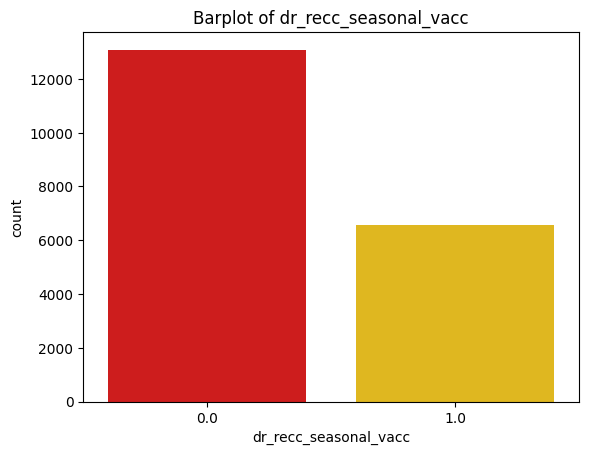

In [ ]:
sns.countplot(x='dr_recc_seasonal_vacc', data=df , palette='hot')
plt.title('Barplot of dr_recc_seasonal_vacc')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.dr_recc_seasonal_vacc)
chi2_contingency(ct_face, correction = False)

Chi2ContingencyResult(statistic=875.3779473401858, pvalue=2.21025047497519e-192, dof=1, expected_freq=array([[10082.50931677,  5045.49068323],
       [ 3008.49068323,  1505.50931677]]))

## chronic_medic_condition [0 and 1]



In [ ]:
df.chronic_medic_condition.isnull().sum()

0

In [ ]:
df.chronic_medic_condition.value_counts()

,count
chronic_medic_condition,
0.0,14066
1.0,5576


Text(0.5, 1.0, 'Barplot of chronic_medic_condition')

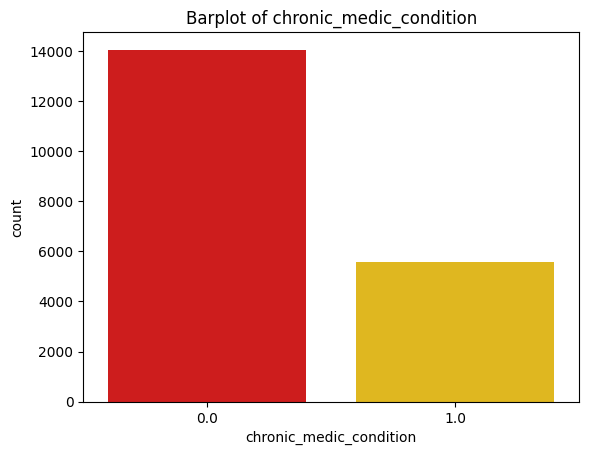

In [ ]:
sns.countplot(x='chronic_medic_condition', data=df , palette='hot')
plt.title('Barplot of chronic_medic_condition')

In [ ]:
ct_face=pd.crosstab(df.h1n1_vaccine, df.chronic_medic_condition)
chi2_contingency(ct_face, correction = False)

Chi2ContingencyResult(statistic=219.14944840010486, pvalue=1.3864754403096512e-49, dof=1, expected_freq=array([[10833.44099379,  4294.55900621],
       [ 3232.55900621,  1281.44099379]]))

## is_health_worker [0 and 1]

In [ ]:
df.is_health_worker.isnull().sum()

0

In [ ]:
df.is_health_worker.value_counts()

,count
is_health_worker,
0.0,17310
1.0,2332


Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

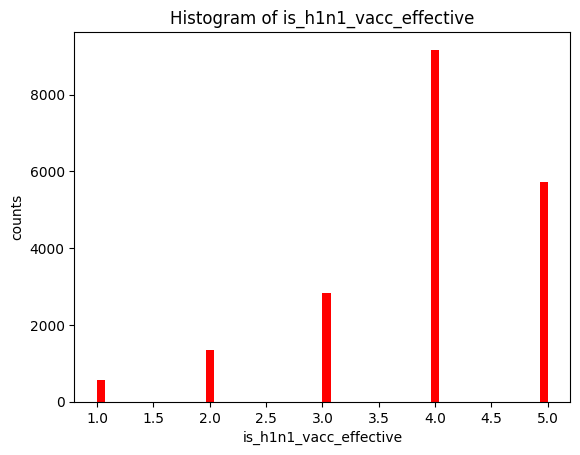

In [ ]:
plt.hist(df.is_h1n1_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_h1n1_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_h1n1_vacc_effective')

<Axes: >

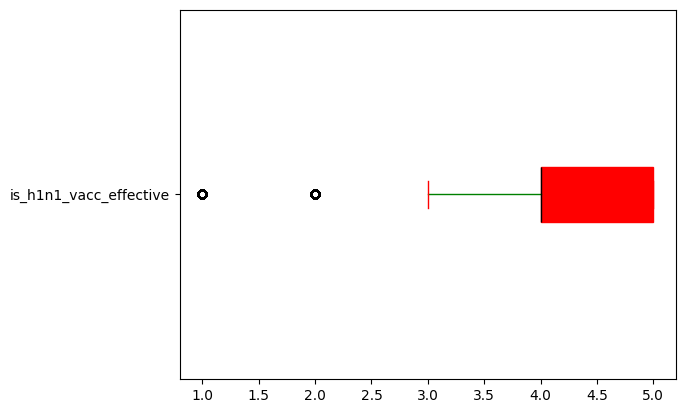

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['is_h1n1_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
# few outliers on lower side; IGNORE!
df.is_h1n1_vacc_effective.isnull().sum() #0 Missing values


0

In [ ]:
df.is_h1n1_vacc_effective.value_counts()

,count
is_h1n1_vacc_effective,
4.0,9172
5.0,5715
3.0,2838
2.0,1347
1.0,570


Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

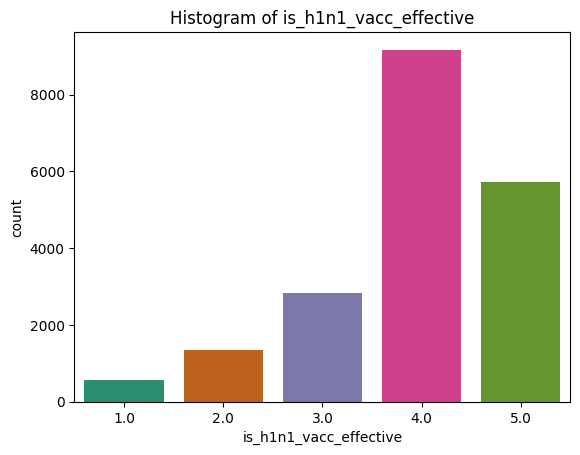

In [ ]:
sns.countplot(x = 'is_h1n1_vacc_effective', data = df, palette = 'Dark2')
plt.title('Histogram of is_h1n1_vacc_effective')

sick_from_h1n1_vacc

Text(0.5, 1.0, 'Histogram of sick_from_h1n1_vacc')

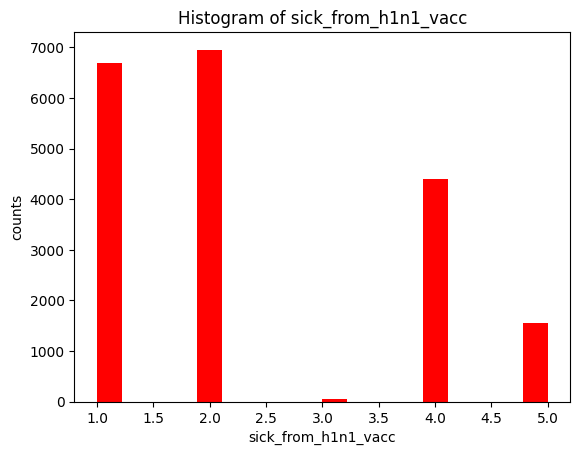

In [ ]:
plt.hist(df.sick_from_h1n1_vacc, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_h1n1_vacc')
plt.ylabel('counts')
plt.title('Histogram of sick_from_h1n1_vacc')

<Axes: >

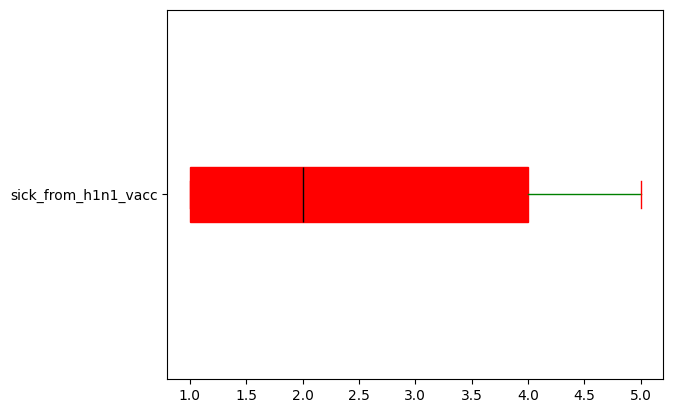

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['sick_from_h1n1_vacc'].plot.box(color=props2, patch_artist = True, vert = False)

In [ ]:
df.sick_from_h1n1_vacc.isnull().sum() #0 Missing values
df.sick_from_h1n1_vacc.value_counts()

,count
sick_from_h1n1_vacc,
2.0,6956
1.0,6684
4.0,4390
5.0,1560
3.0,52


Text(0.5, 1.0, 'Histogram of is_seas_vacc_effective')

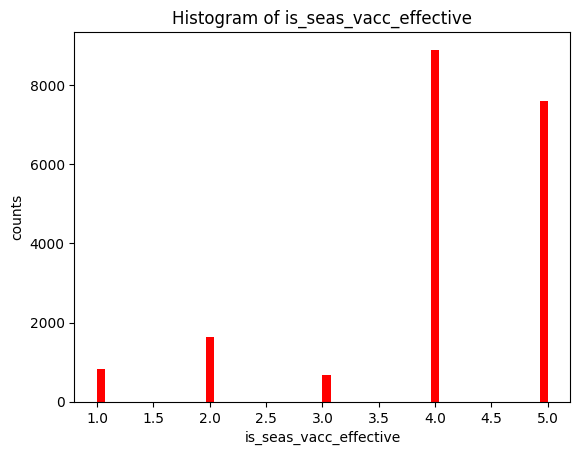

In [ ]:
plt.hist(df.is_seas_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_seas_vacc_effective')

<Axes: >

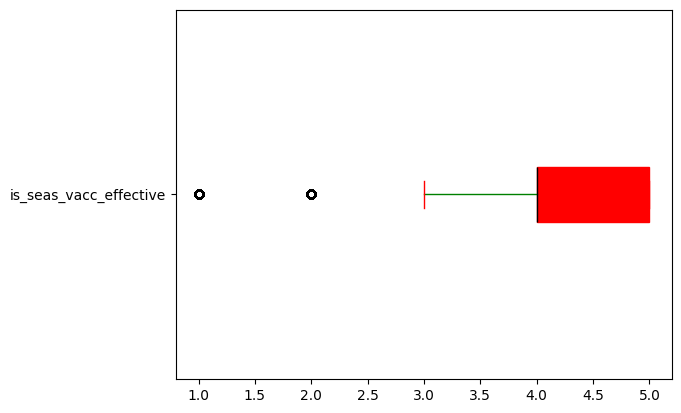

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['is_seas_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)

few are on lower side ignore outliers


In [ ]:
df.is_seas_vacc_effective.isnull().sum() #0 Missing values
df.is_seas_vacc_effective.value_counts()

,count
is_seas_vacc_effective,
4.0,8906
5.0,7603
2.0,1638
1.0,822
3.0,673


In [18]:
df['age_bracket'] = df.get('age_bracket').replace('65+ Years', 5)
df['age_bracket'] = df.get('age_bracket').replace('55 - 64 Years', 4)
df['age_bracket'] = df.get('age_bracket').replace('45 - 54 Years', 3)
df['age_bracket'] = df.get('age_bracket').replace('18 - 34 Years', 1)
df['age_bracket'] = df.get('age_bracket').replace('35 - 44 Years', 2)

###replacing the categorical age brackets with numerical values

do  not do label encoding as it is already labelled

In [19]:
df.age_bracket.isnull().sum() #0 Missing values
df.age_bracket.value_counts()

,count
age_bracket,
5,4491
4,4234
3,4038
1,3925
2,2954


<Axes: >

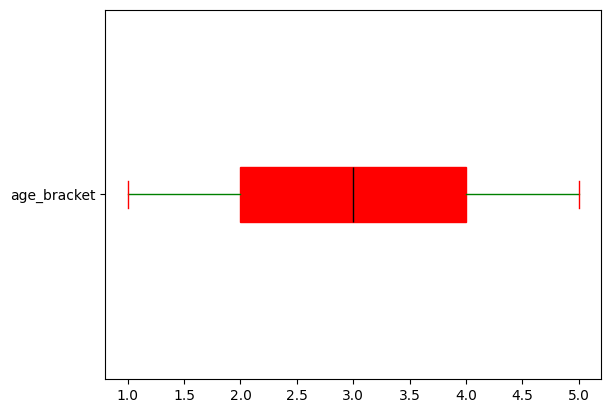

In [20]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['age_bracket'].plot.box(color=props2, patch_artist = True, vert = False)

Text(0.5, 1.0, 'Histogram of age')

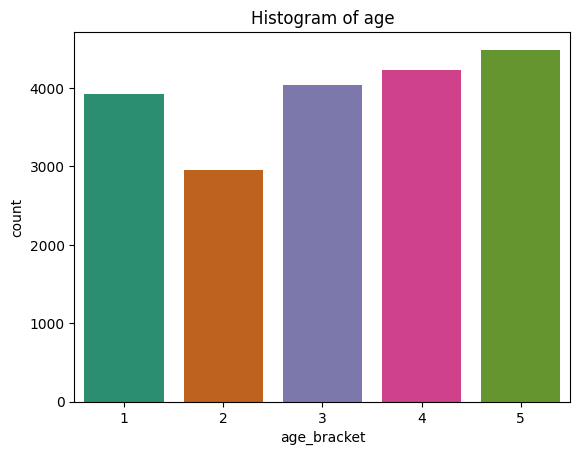

In [21]:
sns.countplot(x = 'age_bracket', data = df, palette = 'Dark2')
plt.title('Histogram of age')

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('sick_from_seas_vacc~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      1.496253  1.496253  0.851088  0.356256
Residual      19640.0  34528.036789  1.758047       NaN       NaN


##p vale greater than 0.05 caution not a good predictor

In [25]:
df.qualification.isnull().sum()
df.qualification.value_counts()

,count
qualification,
College Graduate,8165
Some College,5570
12 Years,4287
< 12 Years,1620


## actually its ordered in thre levels (ordinal form)

In [26]:
df['qualification'] =df.get( 'qualification').replace('College Graduate', 4)
df['qualification'] =df.get('qualification').replace('Some College', 3)
df['qualification'] =df.get( 'qualification').replace('12 Years', 2)
df['qualification'] =df.get('qualification').replace('< 12 Years', 1)

Text(0.5, 1.0, 'Histogram of qual')

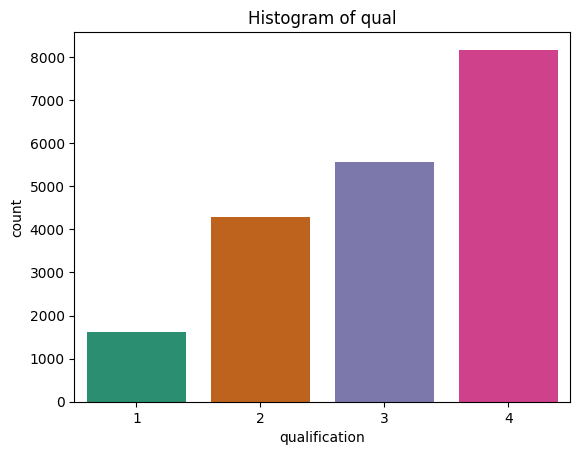

In [27]:
sns.countplot(x = 'qualification', data = df, palette = 'Dark2')
plt.title('Histogram of qual')

<Axes: >

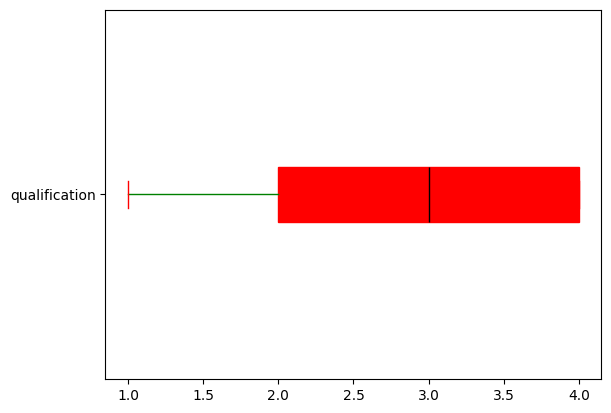

In [ ]:
props2= dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['qualification'].plot.box(color=props2, patch_artist = True, vert = False)

### race - object ,nominal

In [28]:
df.race.isnull().sum()
df.race.value_counts()

,count
race,
White,15745
Black,1474
Hispanic,1295
Other or Multiple,1128


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['race']= le.fit_transform(df['race'])
df.race.value_counts()

,count
race,
3,15745
0,1474
1,1295
2,1128


Text(0.5, 1.0, 'Histogram of race')

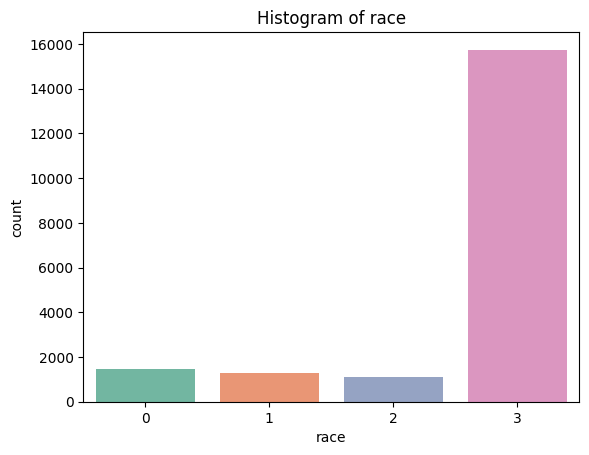

In [30]:
sns.countplot(x = 'race', data = df,palette = 'Set2')
plt.title('Histogram of race')

sex - object[female,male]

In [31]:
df.sex.isnull().sum()
df.sex.value_counts()

,count
sex,
Female,11638
Male,8004


In [32]:
df['sex']= le.fit_transform(df['sex'])
df.sex.value_counts()

,count
sex,
0,11638
1,8004


Text(0.5, 1.0, 'Histogram of sex')

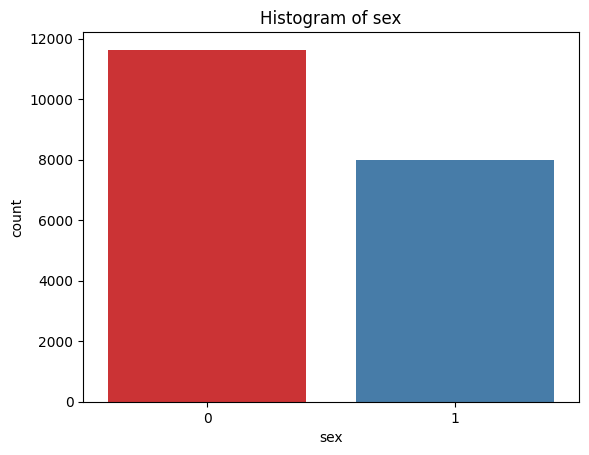

In [33]:
sns.countplot(x = 'sex', data = df,palette = 'Set1')
plt.title('Histogram of sex')

In [34]:
from scipy.stats import chi2_contingency
ct_sex = pd.crosstab(df.h1n1_vaccine, df.sex)
chi2_contingency (ct_sex, correction = False)

Chi2ContingencyResult(statistic=12.498872792045749, pvalue=0.0004071976301199202, dof=1, expected_freq=array([[8963.42857143, 6164.57142857],
       [2674.57142857, 1839.42857143]]))

### income_level -object,ordered



In [35]:
df.income_level.isnull().sum()
df.income_level.value_counts()

,count
income_level,
"<= $75,000, Above Poverty",11185
"> $75,000",6159
Below Poverty,2298


In [36]:
df['income_level']=df.get('income_level').replace('Below Poverty', 1)
df['income_level']=df.get('income_level').replace('<= $75,000, Above Poverty',2)
df['income_level']=df.get('income_level').replace('> $75,000', 3)
df.income_level.value_counts()

,count
income_level,
2,11185
3,6159
1,2298


Text(0.5, 1.0, 'Histogram of income_level')

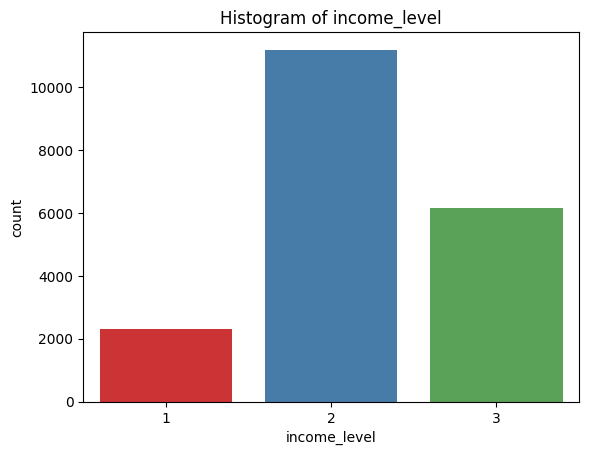

In [37]:
sns.countplot(x = 'income_level', data = df,palette = 'Set1')
plt.title('Histogram of income_level')

In [38]:
from scipy.stats import chi2_contingency
ct_income_level = pd.crosstab(df.h1n1_vaccine, df.income_level)
chi2_contingency (ct_income_level, correction = False)

Chi2ContingencyResult(statistic=69.46798035099587, pvalue=8.226587707809212e-16, dof=2, expected_freq=array([[1769.88819876, 8614.53416149, 4743.57763975],
       [ 528.11180124, 2570.46583851, 1415.42236025]]))

### marital_status -object[0,1]

In [39]:
df.marital_status.isnull().sum()
df.marital_status.value_counts()

,count
marital_status,
Married,10768
Not Married,8874


In [40]:
df['marital_status']= le.fit_transform(df['marital_status'])
df.marital_status.value_counts()

,count
marital_status,
0,10768
1,8874


Text(0.5, 1.0, 'Histogram of marital_status')

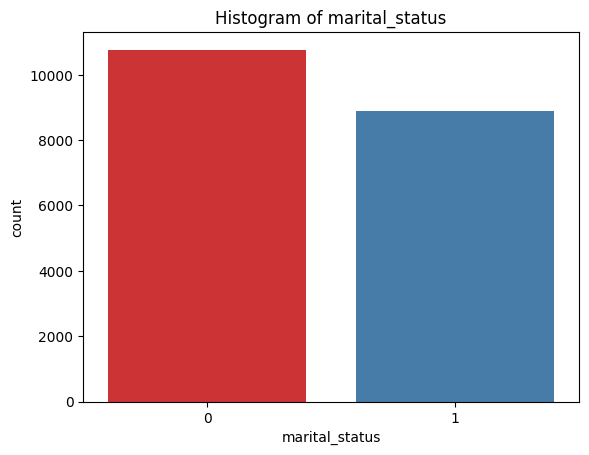

In [41]:
sns.countplot(x = 'marital_status', data = df,palette = 'Set1')
plt.title('Histogram of marital_status')

In [42]:
from scipy.stats import chi2_contingency
ct_marital_status = pd.crosstab(df.marital_status, df.marital_status)
chi2_contingency (ct_marital_status, correction = False)

Chi2ContingencyResult(statistic=19641.999999999996, pvalue=0.0, dof=1, expected_freq=array([[5903.15772325, 4864.84227675],
       [4864.84227675, 4009.15772325]]))

### housing_status - object [own,rent]

In [43]:
df.housing_status.isnull().sum()
df.housing_status.value_counts()

,count
housing_status,
Own,14980
Rent,4662


In [44]:
df['housing_status']= le.fit_transform(df['housing_status'])
df.housing_status.value_counts()

,count
housing_status,
0,14980
1,4662


### employment - object , ordered 3levels

In [45]:
df['employment']=df.get('employment').replace('Employed', 3)
df['employment']=df.get('employment').replace('Not in Labor Force',2)
df['employment']=df.get('employment').replace('Unemployed', 1)
df.employment.value_counts()

,count
employment,
3,11093
2,7417
1,1132


### census_msa - object, 3 levels, nominal

In [46]:
df['census_msa']= le.fit_transform(df['census_msa'])
df.census_msa.value_counts()

,count
census_msa,
0,8571
1,5717
2,5354


Text(0.5, 1.0, 'Histogram of census_msa')

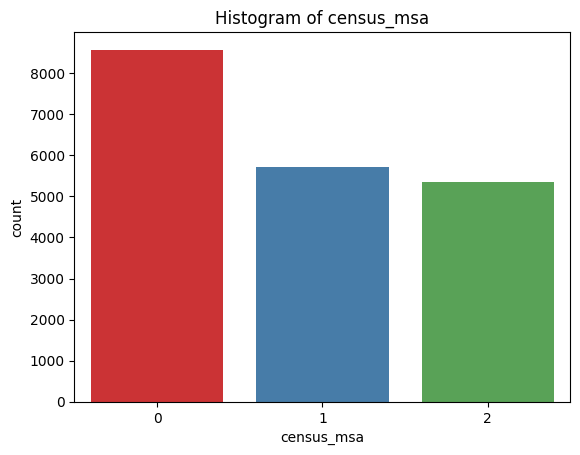

In [47]:
sns.countplot(x = 'census_msa', data = df,palette = 'Set1')
plt.title('Histogram of census_msa')

### no_of_adults - ordered

Text(0.5, 1.0, 'Histogram of no_of_adults')

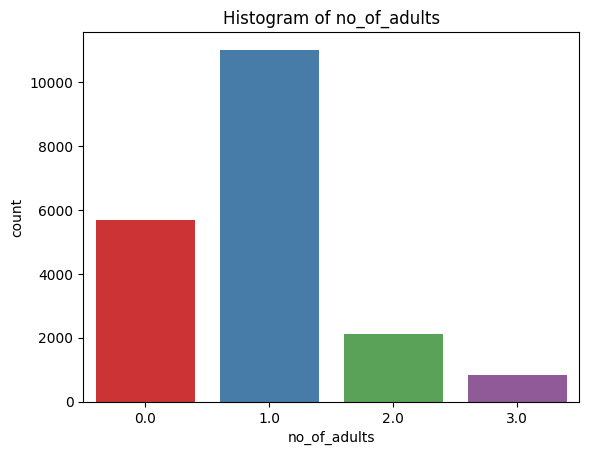

In [48]:
sns.countplot(x = 'no_of_adults', data = df,palette = 'Set1')
plt.title('Histogram of no_of_adults')

In [49]:
mod = ols('no_of_adults~ h1n1_vaccine', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

                   df        sum_sq   mean_sq        F    PR(>F)
h1n1_vaccine      1.0      0.192588  0.192588  0.34578  0.556518
Residual      19640.0  10938.824060  0.556967      NaN       NaN


from the above steps we infer that 3 features are bad predictors

In [50]:
hn=df.drop(['sick_from_seas_vacc','census_msa','no_of_adults','no_of_children'],axis=1)
hn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  float64


In [51]:
df=pd.get_dummies(hn.race,drop_first=True,prefix='race')
hnd=pd.concat([hn,df],axis=1)

In [52]:
hnc=hnd.drop(['race'],axis=1)
hnc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  float64


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

### Check VIF for each features

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

x = hnc.iloc[:, [1,2,15,16,17,18,19,20,21,23,26]]
x = x.dropna()
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

                   feature        VIF
0           h1n1_awareness   6.326902
1     antiviral_medication   1.077988
2            is_h1n1_risky   7.166750
3      sick_from_h1n1_vacc   4.307004
4   is_seas_vacc_effective  14.170557
5            is_seas_risky   8.012743
6              age_bracket   5.253674
7            qualification   9.285438
8                      sex   1.638125
9           marital_status   1.752107
10            h1n1_vaccine   1.508542


In [55]:
columns_to_drop = ['is_h1n1_vacc_effective', 'is_seas_vacc_effective', 'qualification', 'employment']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   race_1  19642 non-null  bool 
 1   race_2  19642 non-null  bool 
 2   race_3  19642 non-null  bool 
dtypes: bool(3)
memory usage: 211.0 KB


### Target Variable(y) - 'h1n1_vaccine'

In [56]:
X = df.loc[:, df.columns != 'h1n1_vaccine']
y= df.loc[:, df.columns == 'h1n1_vaccine']

In [57]:
# One-hot encode categorical features in X
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_encoded = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)


### Fitting the model

In [59]:
# ipython-input-56-655ed9c52498
X = df.loc[:, df.columns != 'h1n1_vaccine']
y = df['h1n1_vaccine'] # Select the 'h1n1_vaccine' column as a Series

# ipython-input-57-655ed9c52498
# One-hot encode categorical features in X
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_encoded = imputer.fit_transform(X)

# Convert y_train to a 1D array or Series before fitting the model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)
y_train = y_train.values.ravel()  # Convert to a 1D numpy array


# ipython-input-58-655ed9c52498
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X_train, y_train) # Now, the model should fit without the ValueError

KeyError: 'h1n1_vaccine'

In [61]:
df.head()

,race_1,race_2,race_3
0,False,False,True
1,False,False,True
3,False,False,True
4,False,False,True
5,False,False,True
